In [1]:
#IMPORTANDO LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [78]:
df = pd.read_csv("df_definitivo.csv", index_col=0)
df.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,generation
0,53,No,NaN,2015.722222,research & development,6,3,NaN,1,1,Male,3,5,research director,3,NaN,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,5,3.0,20,15.0,15,15,1972,195370.0,True,Gen X


# Contexto

# Generación

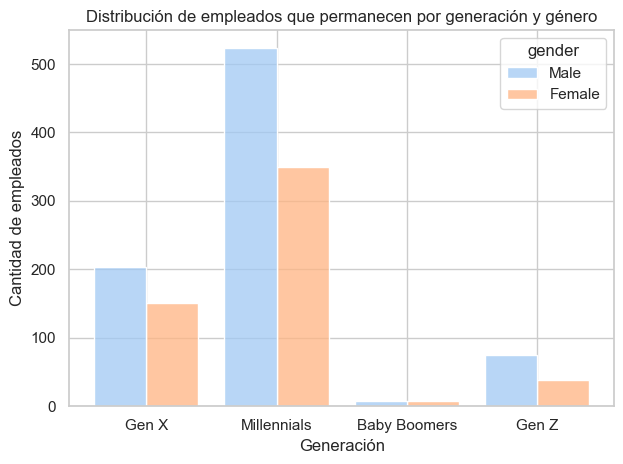

In [ ]:

# Filtrar solo empleados que permanecen en la empresa
# “Dentro dos Millennials, cual a % quedo?”
# “Dentro da Gen Z, cual % quedo?”

df_attrition_no = df[df['attrition'] == 'No']

# Histograma con hue por género
sns.histplot(data=df_attrition_no,
             x='generation',
             hue='gender',
             multiple='dodge',
             shrink=0.8,
             palette='pastel')

plt.title('Distribución de empleados que permanecen por generación y género')
plt.xlabel('Generación')
plt.ylabel('Cantidad de empleados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### Aunque la mayoría de los empleados actuales de la empresa pertenecen a la generación Millennial, los datos muestran que la Generación Z es la que más ha abandonado la organización en términos proporcionales.

In [102]:
# Cuántos empleados dejaron la empresa ("Yes") por generación
# DataFrame con proporciones de attrition = Yes por generación
attrition_rate = df[df['attrition'] == 'Yes'].groupby('generation').size() / df.groupby('generation').size()
round(attrition_rate * 100, 2)

generation
Baby Boomers      NaN
Gen X           12.38
Gen Z           35.43
Millennials     14.41
dtype: float64

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1336119186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")


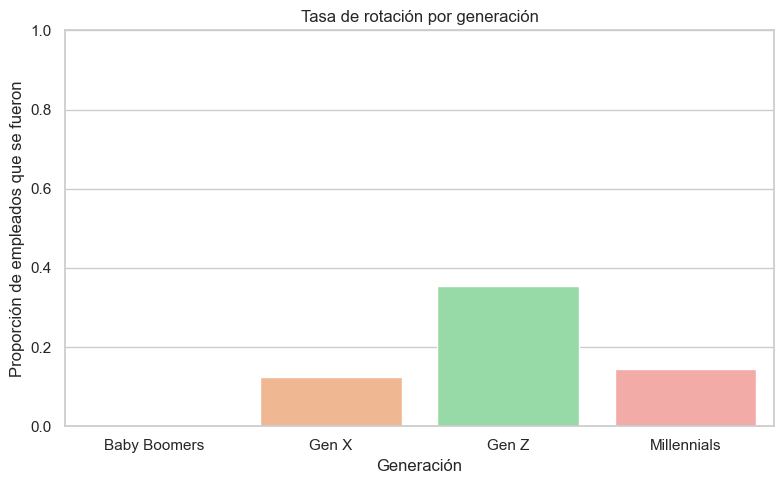

In [103]:
# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="pastel")
plt.ylabel("Proporción de empleados que se fueron")
plt.xlabel("Generación")
plt.title("Tasa de rotación por generación")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Este resultado puede explicarse considerando las características generales de cada generación:

### 👥 Baby Boomers (nacidos aprox. entre 1946–1964)
Leales y comprometidos con el empleo a largo plazo.

Valoran la estabilidad y la estructura.

Su presencia en la empresa es mínima o nula, y casi no presentan casos de rotación.

### 👥 Generación X (1965–1980)
Autonomía, equilibrio vida-trabajo y enfoque práctico.

Rotación moderada; tienden a permanecer si encuentran flexibilidad y reconocimiento.

### 👥 Millennials (1981–1996)
Son la generación más numerosa dentro de la empresa.

Valoran el propósito, el aprendizaje continuo y el ambiente colaborativo.

Su tasa de rotación es baja en comparación con su volumen total, lo que indica una integración efectiva.

### 👥 Generación Z (1997 en adelante)
Más jóvenes, digitales y con altas expectativas de movilidad profesional.

Buscan desarrollo rápido, flexibilidad y propósito claro.

A pesar de ser menos numerosos que los Millennials, presentan la mayor tasa de rotación, lo que sugiere posibles desafíos de adaptación o retención en la empresa.

Con el pasar del tiempo sera la generación mas representativa ⚠️

In [ ]:
# No hay Gen Z en Research Director y Manager
tabela = pd.crosstab(df['jobrole'], df['generation']).reset_index()
tabela


generation,jobrole,Baby Boomers,Gen X,Gen Z,Millennials
0,healthcare representative,1,51,3,94
1,human resources,1,12,8,36
2,laboratory technician,1,45,52,180
3,manager,3,71,0,37
4,manufacturing director,2,39,8,109
5,research director,0,51,0,37
6,research scientist,1,50,47,216
7,sales executive,6,76,27,260
8,sales representative,0,9,30,51


# Genero

In [ ]:
# Oportunidad de iguald de genero (exepcion manufacturing director)
tabela_1 = pd.crosstab(df['jobrole'], df['gender']).reset_index()
tabela_1

gender,jobrole,Female,Male
0,healthcare representative,62,87
1,human resources,17,40
2,laboratory technician,92,186
3,manager,49,62
4,manufacturing director,79,79
5,research director,35,53
6,research scientist,120,194
7,sales executive,149,220
8,sales representative,40,50


# Educacación 

La mayoría de los empleados posee estudios universitarios (nivel 3) o de posgrado (nivel 4), lo cual es coherente con el perfil de una empresa tecnológica especializada en inteligencia artificial y ciencia de datos como ABC Corporation.

Dado que una parte considerable del personal se encuentra en los niveles 3 y 4, podría ser estratégico fomentar programas de formación continua, como becas para másteres o doctorados, que refuercen la retención y el desarrollo del talento interno.

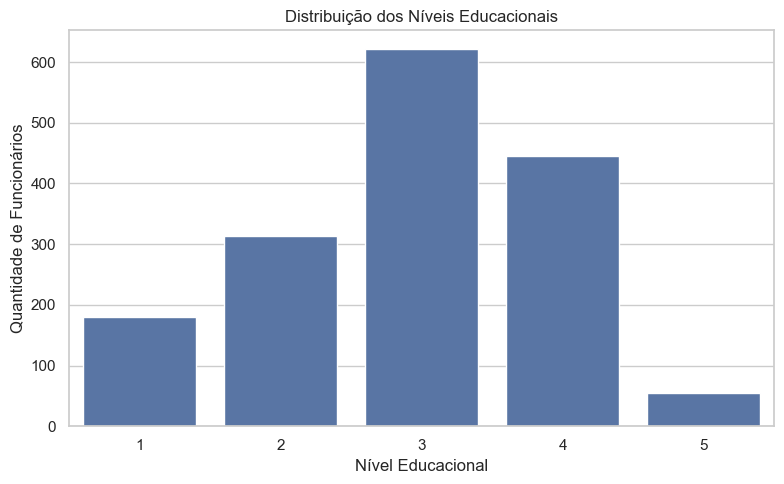

In [104]:
educ_counts = df['education'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=educ_counts.index, y=educ_counts.values)
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade de Funcionários')
plt.title('Distribuição dos Níveis Educacionais')
plt.tight_layout()
plt.show()

## Departamiento 

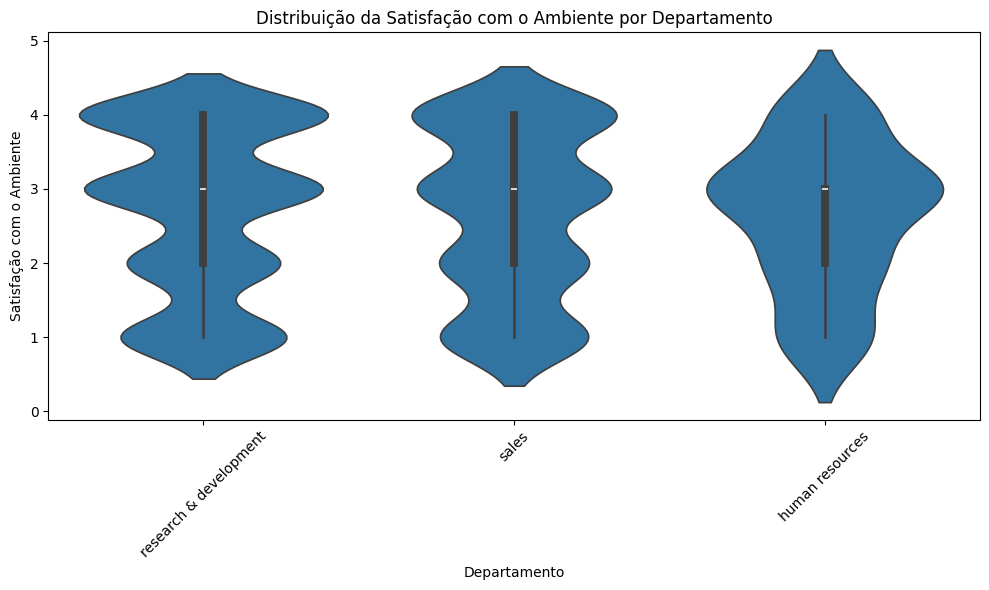

In [7]:
# Satisfação no ambiente de trabalho por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='department', y='environmentsatisfaction', inner='box')
plt.xticks(rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Satisfação com o Ambiente')
plt.title('Distribuição da Satisfação com o Ambiente por Departamento')
plt.tight_layout()
plt.show()

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/998575687.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged, x='department', y='satisfacao_media', palette='pastel')


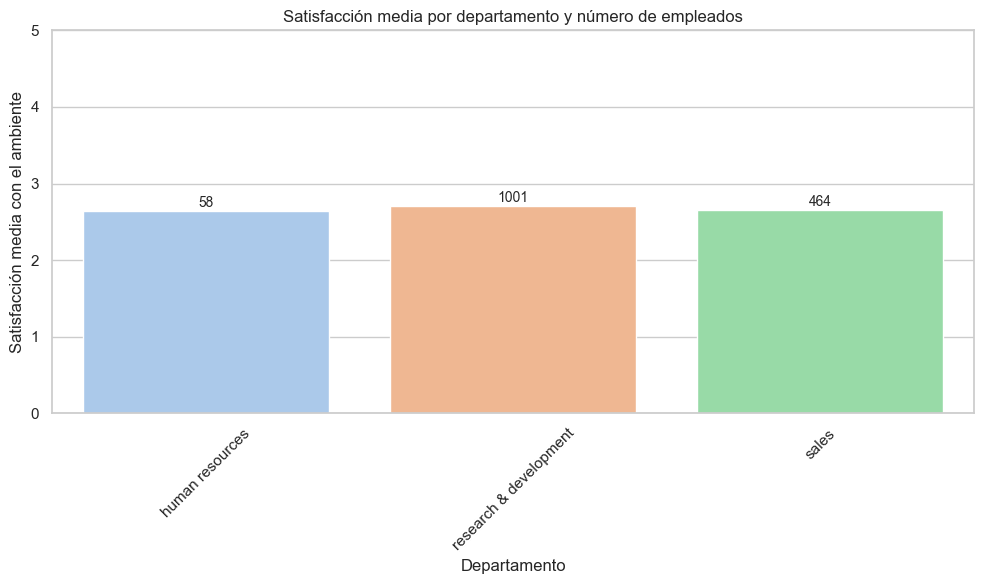

In [107]:
# Calcular média de satisfação e número de funcionários por departamento
satisfacao_media = df.groupby('department')['environmentsatisfaction'].mean()
tamanho_departamento = df['department'].value_counts()

# Criar DataFrame combinado
df_merged = pd.DataFrame({
    'satisfacao_media': satisfacao_media,
    'num_funcionarios': tamanho_departamento
}).reset_index()

# Gráfico de barras com anotação do volume
plt.figure(figsize=(10, 6))
sns.barplot(data=df_merged, x='department', y='satisfacao_media', palette='pastel')

# Adicionar número de funcionários acima das barras
for index, row in df_merged.iterrows():
    plt.text(index, row.satisfacao_media + 0.05, f"{int(row.num_funcionarios)}", ha='center', fontsize=10)

plt.title('Satisfacción media por departamento y número de empleados')
plt.ylabel('Satisfacción media con el ambiente')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


### La satisfacción media con el ambiente laboral es relativamente uniforme entre departamentos, rondando el valor 2.7 en una escala de 1 a 4.
### El área de Research & Development, que concentra la mayoría del personal, muestra una leve ventaja en percepción ambiental y debe ser el enfoque de estrategias ya que tiene mayor concentracion de empleados

## Overtime

In [ ]:
# % de los valores unique de overtime

# Excluir valores "unknown" antes de calcular
percentuais_overtime_filtrado = df[df['overtime'] != 'unknown']['overtime'].value_counts(normalize=True) * 100

# Mostrar com 2 casas decimais
print(percentuais_overtime_filtrado.round(2))


overtime
No         42.26
Unknown    41.88
Yes        15.86
Name: proportion, dtype: float64


/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/4277657484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado, x='overtime', palette='pastel')


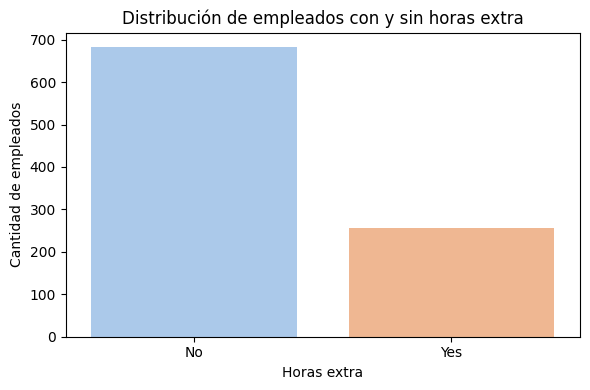

In [ ]:
# Filtrar registros com valores válidos em 'overtime'
df_filtrado = df[df['overtime'] != 'Unknown']

# Gráfico: Distribución de empleados con y sin horas extra  SIN NULOS
plt.figure(figsize=(6, 4))
sns.countplot(data=df_filtrado, x='overtime', palette='pastel')
plt.title('Distribución de empleados con y sin horas extra')
plt.xlabel('Horas extra')
plt.ylabel('Cantidad de empleados')
plt.tight_layout()
plt.show()



/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1103441713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_no.index, y=total_no.values, ax=axes[0], palette=colors)
/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_58447/1103441713.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_yes.index, y=total_yes.values, ax=axes[1], palette=colors)


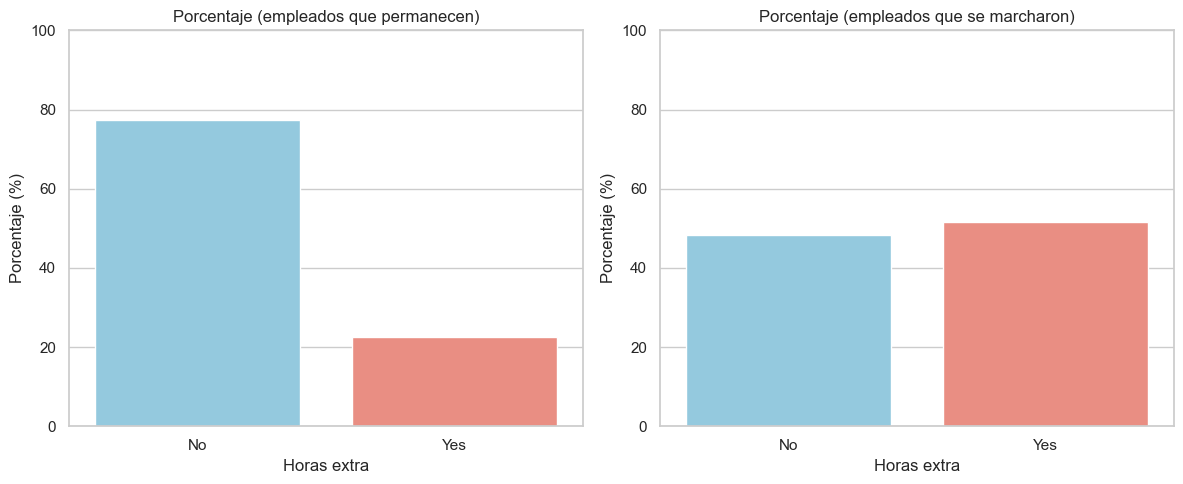

In [130]:
# Reordenar os valores para garantir que as cores sejam atribuídas corretamente
total_no = df_filtrado[df_filtrado['attrition'] == 'No']['overtime'].value_counts(normalize=True).reindex(['No', 'Yes']) * 100
total_yes = df_filtrado[df_filtrado['attrition'] == 'Yes']['overtime'].value_counts(normalize=True).reindex(['No', 'Yes']) * 100

# Criar gráficos com cores consistentes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)
colors = ['skyblue', 'salmon']  # 'No' = azul, 'Yes' = salmão

# Gráfico: funcionários que permanecem
sns.barplot(x=total_no.index, y=total_no.values, ax=axes[0], palette=colors)
axes[0].set_title('Porcentaje (empleados que permanecen)')
axes[0].set_xlabel('Horas extra')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_ylim(0, 100)

# Gráfico: funcionários que se marcharam
sns.barplot(x=total_yes.index, y=total_yes.values, ax=axes[1], palette=colors)
axes[1].set_title('Porcentaje (empleados que se marcharon)')
axes[1].set_xlabel('Horas extra')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


| Tipo de gráfico     | Linha principal                         |
| ------------------- | --------------------------------------- |
| Quantidade absoluta | `sns.countplot(data=..., x='overtime')` |
| Proporção (%)       | `value_counts(normalize=True) * 100`    |


### Representatividad expreseiva de horas extras en los empleados que salieron 

⚠️

In [ ]:
# Filtrar registros válidos (sem "Unknown" em overtime)
df_filtrado = df[df['overtime'] != 'Unknown']

# Agrupar por 'attrition' e calcular a % de 'overtime' = 'Yes'
porcentagem_overtime_por_attrition = (df_filtrado[df_filtrado['overtime'] == 'Yes'].groupby('attrition').size()/ df_filtrado.groupby('attrition').size()) * 100

# Exibir resultado arredondado
print(porcentagem_overtime_por_attrition.round(2))

attrition
No     22.62
Yes    51.66
dtype: float64


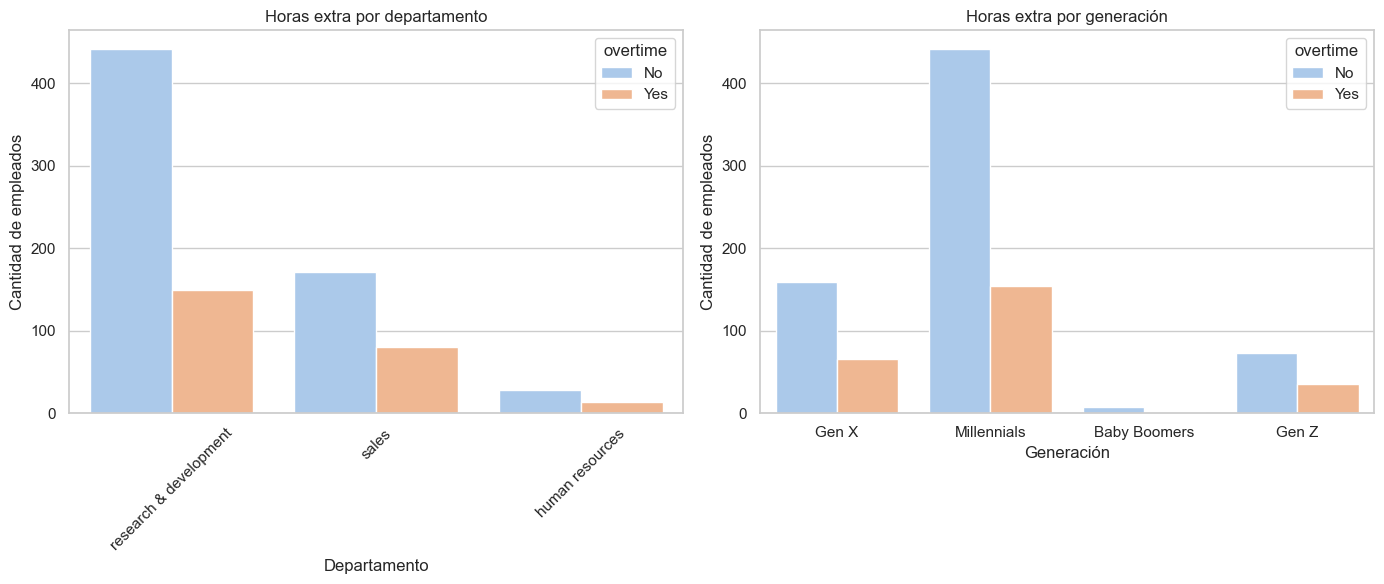

In [121]:

# Criar figura com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)
sns.set(style="whitegrid")

# Gráfico 1: Horas extra por departamento
sns.countplot(data=df_filtrado, x='department', hue='overtime',
              ax=axes[0], palette='pastel')
axes[0].set_title('Horas extra por departamento')
axes[0].set_xlabel('Departamento')
axes[0].set_ylabel('Cantidad de empleados')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Horas extra por generación
sns.countplot(data=df_filtrado, x='generation', hue='overtime',
              ax=axes[1], palette='pastel')
axes[1].set_title('Horas extra por generación')
axes[1].set_xlabel('Generación')
axes[1].set_ylabel('Cantidad de empleados')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


### Horas extras en el grupo mas representativo (R&D) pero esperado por la misma razon



In [31]:
# Porcentagem por departamento
porcentagem = (departamentos / departamentos.sum()) * 100
print(porcentagem.round(2))


department
research & development    53.95
sales                     40.79
human resources            5.26
Name: count, dtype: float64


In [140]:
# Filtrar apenas os funcionários que saíram e faziam horas extra
filtro = (df['attrition'] == 'Yes') & (df['overtime'] == 'Yes')
df_filtrados = df[filtro]

# Contar por departamento
departamentos = df_filtrados['jobrole'].value_counts()

# Mostrar resultado
print(departamentos)


jobrole
sales executive              19
research scientist           19
laboratory technician        17
sales representative         12
human resources               4
healthcare representative     2
manager                       2
manufacturing director        2
research director             1
Name: count, dtype: int64


In [136]:
# Calcular proporção de funcionários com OverTime dentro de cada cargo
proporcao_overtime_por_role = (
    df[df['overtime'] == 'Yes'].groupby('jobrole').size() /
    df.groupby('jobrole').size()
) * 100

# Ordenar do maior para o menor
print(proporcao_overtime_por_role.sort_values(ascending=False).round(1))


jobrole
human resources              22.8
sales representative         22.2
research scientist           17.8
sales executive              15.7
healthcare representative    15.4
manager                      15.3
manufacturing director       13.9
research director            13.6
laboratory technician        12.6
dtype: float64


# Overtime por Departamiento

In [34]:
# Filtrar empleados que hacen horas extra y NO han dejado la empresa
filtro = (df['overtime'] == 'Yes') & (df['attrition'] == 'No')
df_filtrados = df[filtro]

# Contar por departamento
departamentos = df_filtrados['department'].value_counts()

# Mostrar resultado
print(departamentos)


department
research & development    108
sales                      49
human resources            10
Name: count, dtype: int64


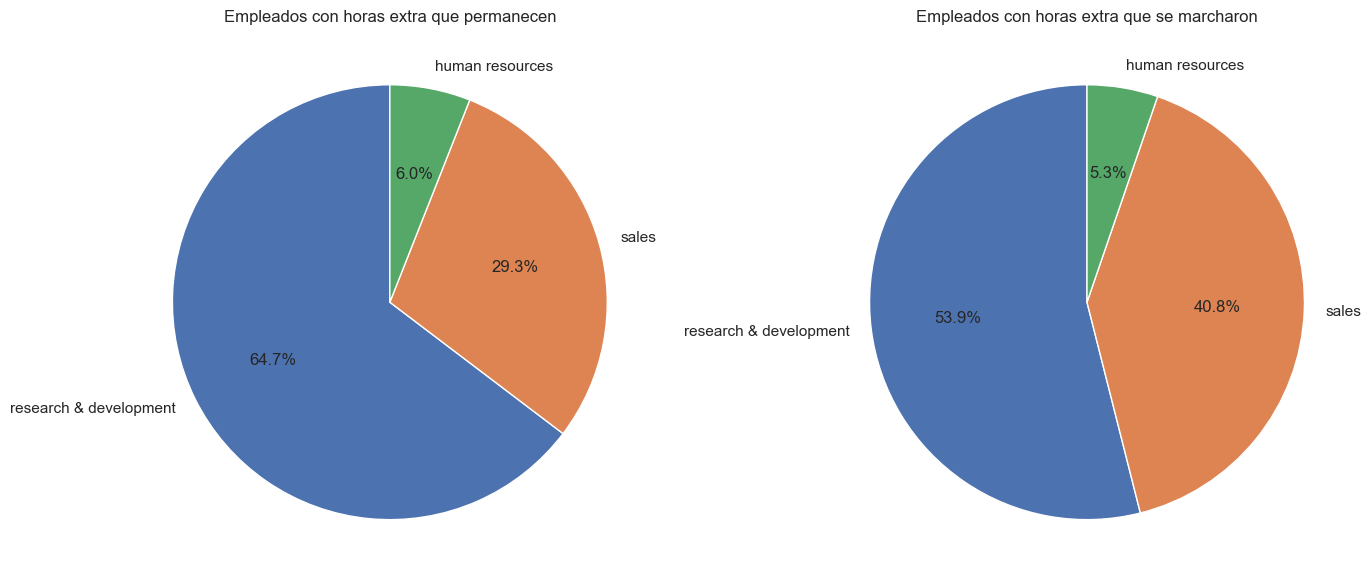

In [38]:
# Filtrar empleados que hacen horas extra y permanecen
filtro_no = (df['overtime'] == 'Yes') & (df['attrition'] == 'No')
departamentos_no = df[filtro_no]['department'].value_counts(normalize=True) * 100

# Filtrar empleados que hacen horas extra y se marcharon
filtro_yes = (df['overtime'] == 'Yes') & (df['attrition'] == 'Yes')
departamentos_yes = df[filtro_yes]['department'].value_counts(normalize=True) * 100

# Crear los dos gráficos de tarta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

# 🥧 Gráfico 1: Permanecen
axes[0].pie(departamentos_no, labels=departamentos_no.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Empleados con horas extra que permanecen')

# 🥧 Gráfico 2: Se marcharon
axes[1].pie(departamentos_yes, labels=departamentos_yes.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Empleados con horas extra que se marcharon')

plt.tight_layout()
plt.show()


# Simulacion con Unknown de Overtime Rellenado

# Basado en el Job Role

In [143]:
# Filtrar solo los registros con OverTime igual a 'Unknown'
df_unknown = df[df['overtime'] == 'Unknown']

# Contar cuántos empleados con 'Unknown' hay por departamento
departamentos_unknown = df_unknown['jobrole'].value_counts()

# Mostrar resultado
print(departamentos_unknown)

porcentajes_departamento_unknown = (departamentos_unknown / departamentos_unknown.sum()) * 100
print(porcentajes_departamento_unknown.round(2))


jobrole
sales executive              176
research scientist           126
laboratory technician        118
manufacturing director        69
healthcare representative     58
manager                       46
sales representative          36
research director             31
human resources               16
Name: count, dtype: int64
jobrole
sales executive              26.04
research scientist           18.64
laboratory technician        17.46
manufacturing director       10.21
healthcare representative     8.58
manager                       6.80
sales representative          5.33
research director             4.59
human resources               2.37
Name: count, dtype: float64


# Basado en el %

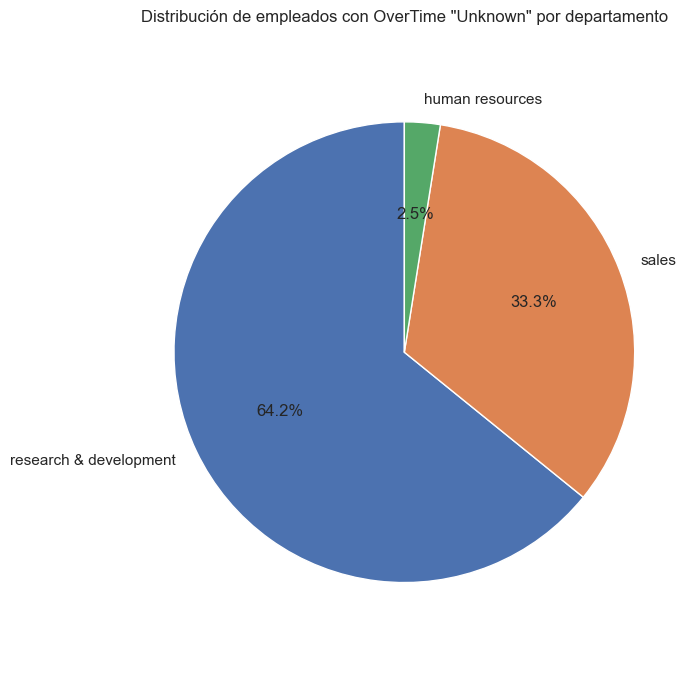

In [77]:
# Filtrar empleados con OverTime = 'Unknown'
df_unknown = df[df['overtime'] == 'Unknown']

# Contar por departamento
departamentos_unknown = df_unknown['department'].value_counts()
porcentajes_departamento_unknown = (departamentos_unknown / departamentos_unknown.sum()) * 100

# Crear gráfico de tarta
plt.figure(figsize=(7, 7))
plt.pie(porcentajes_departamento_unknown,
        labels=porcentajes_departamento_unknown.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de empleados con OverTime "Unknown" por departamento')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()


In [71]:
# 1. Filtrar los datos válidos (sin 'Unknown')
df_validos = df[df['overtime'] != 'Unknown']

# 2. Calcular la proporción de 'Yes' y 'No'
proporciones = df_validos['overtime'].value_counts(normalize=True)

# 3. Contar cuántos empleados tienen 'Unknown'
n_unknown = (df['overtime'] == 'Unknown').sum()

# 4. Estimar cuántos de esos Unknown serían 'Yes' y cuántos 'No'
estimacion = proporciones * n_unknown

estimacion_percentual = (estimacion / n_unknown) * 100

# 5. Mostrar los resultados
print(' Proporciones en los datos conocidos:\n')
print(proporciones.round(2))

print(f'\nTotal de empleados con "Unknown": {n_unknown}')

print('\nEstimación de cómo se podrían repartir esos "Unknown":')
print(estimacion_percentual.round(0))


 Proporciones en los datos conocidos:

overtime
No     0.73
Yes    0.27
Name: proportion, dtype: float64

Total de empleados con "Unknown": 676

Estimación de cómo se podrían repartir esos "Unknown":
overtime
No     73.0
Yes    27.0
Name: proportion, dtype: float64


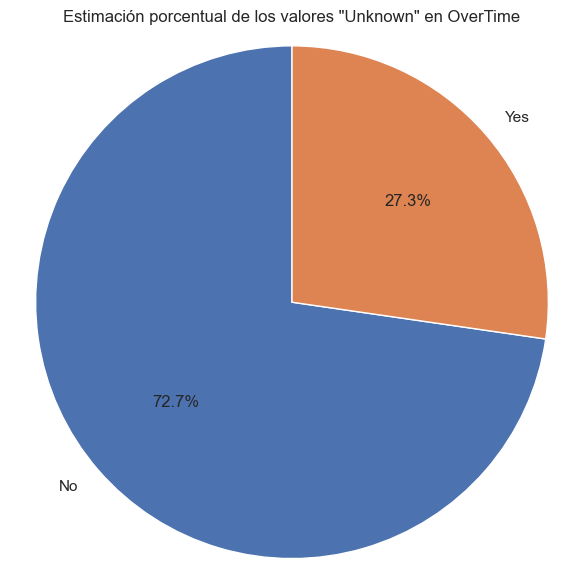

In [72]:
# Gráfico de tarta da estimativa percentual
plt.figure(figsize=(6, 6))
plt.pie(estimacion_percentual,
        labels=estimacion_percentual.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title('Estimación porcentual de los valores "Unknown" en OverTime')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()


# Trabajo Remoto

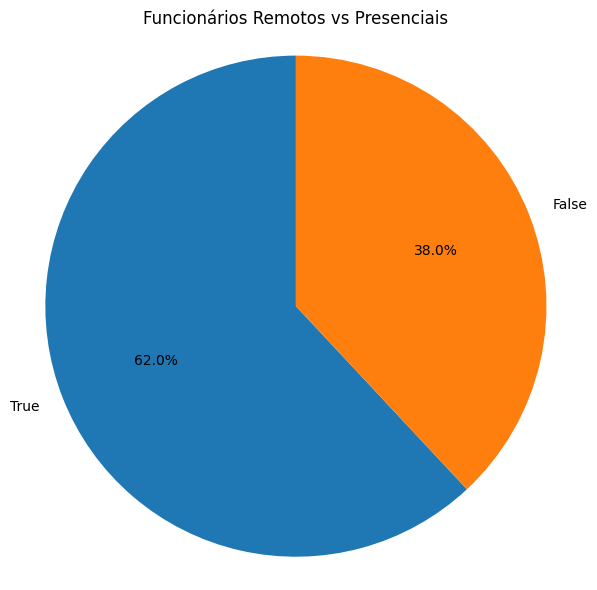

In [12]:
# Contagem de trabalho remoto
remote_counts = df['remotework'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Funcionários Remotos vs Presenciais')
plt.axis('equal')
plt.tight_layout()
plt.show()


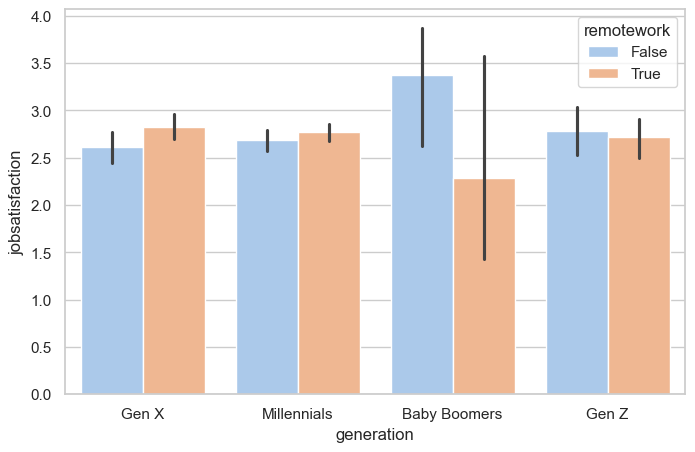

In [39]:
# gen y trabajo remoto
# los baby boomers tiene mas satisfaccion cuando trabajan presencial?

plt.figure(figsize=(8,5))
sns.barplot(data=df,
    x='generation',
    y='jobsatisfaction', hue='remotework',
    palette='pastel');